In [201]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import glob
import os
import sys
import json
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import lib.dataset as dataset
import lib.network as network
import lib.utils as utils
import lib.vis as vis
from PIL import Image
from collections import deque
from tensorflow.python.tools import inspect_checkpoint
from moviepy.editor import *
params=utils.read_params()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
models_remote=utils.list_folders(params["DIRS"]["MODELS_REMOTE"])
window_width=1000
for i,m in enumerate(models_remote):
#     if i==2:
#         break

    try:
   
        model_params=utils.get_model_params(m)
#         net_type=model_params["TRAIN"]["ENCODER_MODE"]+"-"+model_params["TRAIN"]["RNN_MODE"]+"-"+model_params["TRAIN"]["DECODER_MODE"]
        
        loss=utils.get_latest_loss(m,"val")
        print(utils.grep_timestamp(m),model_params["TRAIN"]["EPOCH_COUNT"],np.mean(loss))
        
#         cumsum_vec = np.cumsum(np.insert(loss.flat, 0, 0)) 
#         ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
#         plt.plot(ma_vec,label=net_type)       
#         plt.legend(bbox_to_anchor=(1, 1))
#         plt.xlim(-500,10000)   

    except:
        print(m)
    

('2018-03-25', '04:02:48') 10 0.184593
('2018-03-25', '20:12:51') 10 0.111758
('2018-04-01', '21:42:33') 10 0.154693
('2018-04-02', '20:10:12') 40 0.0979571
('2018-04-13', '22:40:09') 20 0.111596
('2018-04-17', '20:30:03') 10 0.12391
('2018-04-24', '15:35:05') 5 0.139431
('2018-04-26', '00:05:44') 5 0.276599
('2018-04-30', '22:44:26') 2 0.158405
('2018-05-03', '02:58:31') 5 0.152835
('2018-05-04', '06:24:24') 5 0.169342
('2018-05-04', '23:42:53') 10 0.121028
('2018-05-06', '19:29:59') 5 0.175394


In [ ]:
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.savefig("net_types",dpi=1200)   

In [ ]:
utils.fix_nparray(utils.get_latest_epoch(models_remote[6])+"/train_loss.npy")

In [ ]:
cumsum_vec = numpy.cumsum(numpy.insert(data, 0, 0)) 
ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width

In [84]:

model_dir=params["SESSIONS"]["ROBUST"]

In [85]:
print(model_dir)

/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/models_remote/model_2018-05-04_23:42:53


In [86]:
net=network.Network_restored(model_dir)

INFO:tensorflow:Restoring parameters from b'/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/models_remote/model_2018-05-04_23:42:53/epoch_9/model/variables/variables'


INFO:tensorflow:Restoring parameters from b'/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/models_remote/model_2018-05-04_23:42:53/epoch_9/model/variables/variables'


In [89]:
x,y=dataset.load_random_sample()

  "matplotlib is currently using a non-GUI backend, "



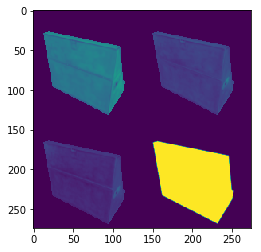

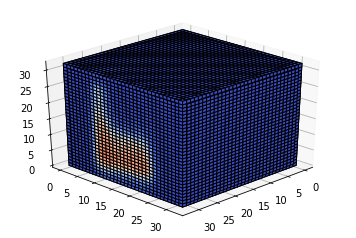

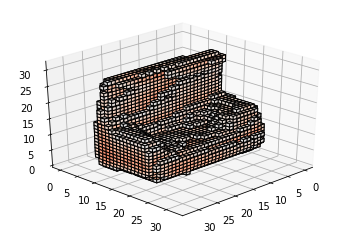

In [101]:
vis.multichannel(x[0],x)
out=net.predict(x)
vis.voxel(out[0,:,:,:,0],out[0,:,:,:,1])
vis.voxel_binary(out[0])

In [ ]:
ims=dataset.load_imgs_from_dir("data/demo_imgs")
ims=np.expand_dims(np.pad(ims,((0,0),(5,5),(5,5),(1,0)),"constant"),0)

In [ ]:
ims.shape

In [ ]:
out=net.predict(ims)

In [ ]:

for angle in range(0, 360,30):
    vis.voxel_binary(out[0],view=(30,angle))
    plt.pause(.001)


In [ ]:
op_list=net.get_operations()

In [ ]:
for o in op_list:
    print(o.name)

In [ ]:
f=utils.list_folders("./models_remote")[-1]

In [ ]:
p=glob.glob(f+"/val/event*")[0]

In [ ]:
for i in tf.train.summary_iterator(p):
    print(i)
    break

In [ ]:
a=tf.random_uniform([4,4])
a_1=tf.pad(a,[[0,0],[0,0]])
b=tf.random_uniform([8,8])
c=tf.random_uniform([16,16])
d=tf.random_uniform([32,32])

In [ ]:
print(a_1)

In [ ]:
params=utils.read_params()
out_dir=params["DIRS"]["OUTPUT"]

In [ ]:
clip=ImageSequenceClip(dataset.construct_file_path_list_from_dir("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/output/02691156_131db4a650873babad3ab188d086d4db",".png"),fps=12)
clip.write_videofile("{}/movie.mp4".format(out_dir))

In [ ]:
out_dir

In [ ]:
epoch_dir="models_remote/model_2018-04-02_20:10:12_L:0.1_E:40_B:16/epoch_0"
model_dir=os.path.dirname(epoch_dir)
X_test,y_test=dataset.load_testset(epoch_dir)
model_info = utils.get_model_info(model_dir)

In [ ]:
x,y=dataset.load_random_sample()
vis.sample(x,y,y,"test.png")

In [ ]:
plt.imshow(ax.get_array())

In [ ]:
ax.write_png("test.png")

In [ ]:
vis.get_pylab_image(ax)

In [ ]:
x,y=dataset.load_obj_id("02691156_131db4a650873babad3ab188d086d4db")

In [ ]:
vis.sample(x,y,y)

In [ ]:
"02691156_131db4a650873babad3ab188d086d4db"

In [ ]:
vis.voxel_binary(yp[0],"frame_{}".format(i))
image_list=utils.filter_files("frame*.png")
print(image_list)
clip=ImageSequenceClip(image_list,fps=6)
clip.write_videofile("movie.mp4")


In [ ]:
loss_paths = dataset.construct_file_path_list_from_dir("aws", "loss.npy")
for path in loss_paths:
    print(path)
    print(utils.grep_learning_rate(path))
    loss_arr = np.load(path)
    print(loss_arr.shape)
    plt.plot(loss_arr.flat)
    plt.show()

In [ ]:
p=np.load("voxel_prediction.npy")
p=np.transpose(p,[0,1,3,4,2])

In [ ]:
vp=np.load("voxel_prediction.npy")[23]
vp=np.transpose(vp,[0,2,3,1])
vis.voxel_b(vp)

In [ ]:
vis.voxel_binary(yp[0])
plt.figure()
plt.imshow(vis.voxel_ndarray(yp[0]))

In [ ]:
weights=np.load("/Users/micmelesse/Documents/3D-reconstruction-with-neural-networks/data/ResidualGRUNet.npy")

In [ ]:
l=utils.list_folders("aws")[-1]
png_ls=dataset.construct_file_path_list_from_dir("aws/model_2018-04-02_20:10:12_L:0.1_E:40_B:16", "_p.png")

In [ ]:
png_ls

In [ ]:
for f in png_ls:
    obj_id=utils.grep_obj_id(f)
    n=utils.grep_stepcount(f)
    new_name=os.path.dirname(f)+"/"+n+'_'+obj_id+'_yp.png'
#     print(f,new_name)
    os.rename(f,new_name)
    

In [ ]:
png_ls

In [ ]:
Image.open(png_ls[2])

In [ ]:
utils.grep_obj_id("uiudasniuansfuas_asnfasnfkasfunkasufn_x.png")

In [ ]:
# toy example

import tensorflow as tf

LEARNING_RATE, EPOCHS=0.01,100                              # hyper paramters

# Build Tensorflow Graph
X = tf.constant([[1],[2],[3]],dtype=tf.float32)             # input
W = tf.Variable(tf.random_uniform([3,3]),dtype=tf.float32)  # paramters
Y = tf.matmul(W,X)                                          # prediction
T = tf.constant([[3],[2],[1]],dtype=tf.float32)             # target label
E = tf.reduce_mean(tf.abs(T-Y))                             # Error 
GD=tf.train.GradientDescentOptimizer(LEARNING_RATE)         # optimizing algorihtm
Gradients = GD.compute_gradients(E)                         # compute the gradients from the Error
TRAIN_STEP = GD.apply_gradients(Gradients)                  # use the gradients to update their paramters


# Run Graph
with tf.Session() as sess:                                  # start tensorflow session
    tf.global_variables_initializer().run()                 # initialize variables
    for i in range(EPOCHS):                                 # open pass over the dataset
        result=sess.run([E,Y,TRAIN_STEP])                   # fetch values from tensorflow graph
        
print(result[0]) 
print(result[1])

In [ ]:
kernel=tf.random_uniform([3,3,10,10])
print(kernel)

kern_1 = tf.concat(tf.unstack(kernel, axis=-1), axis=-1)
kern_2 = tf.transpose(kern_1, [2,0,1])
kern_3 = tf.expand_dims(kern_2, -1)

print(kern_1)
print(kern_2)
print(kern_3)

In [ ]:
ret=tf.random_uniform([36,5,127,127,3])
print(ret)

feature_map_1 = tf.concat(tf.unstack(ret, axis=4), axis=2)
feature_map_2 = tf.concat(tf.unstack(feature_map_1, axis=1), axis=2)
feature_map_3 = tf.expand_dims(feature_map_2, -1)

print(feature_map_1)
print(feature_map_2)
print(feature_map_3)

In [ ]:
kernel=tf.random_uniform([3,3,3,10,10])
print(kernel)

kern_1 = tf.concat(tf.unstack(kernel, axis=-1), axis=-1)
kern_2 = tf.transpose(kern_1,[3,0,1,2])
kern_3 = tf.expand_dims(kern_2,-1)
kern_4 = tf.concat(tf.unstack(kern_3, axis=1), axis=1)

print(kern_1)
print(kern_2)
print(kern_3)
print(kern_4)

In [ ]:
ret=tf.random_uniform([2,32,32,32,2])
print(ret)

vox_slice_1 = tf.unstack(ret, axis=4)[1]
vox_slice_2 = tf.split(vox_slice_1,4, axis=3)
vox_slice_3 = tf.concat(vox_slice_2, axis=2)
vox_slice_4 = tf.concat(tf.unstack(vox_slice_3,axis=-1),axis=1)
vox_slice_5 = tf.expand_dims(vox_slice_4,-1)

print(vox_slice_1)
print(vox_slice_2)
print(vox_slice_3)
print(vox_slice_4)
print(vox_slice_5)
